![image info](https://ineuron.ai/images/ineuron-logo.png)

### 1. Import Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# download_url=https://archive.ics.uci.edu/ml/machine-learning-databases/00547/
df=pd.read_csv(r"C:\Users\soume\task_eda\Algerian_Data\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
# Show Top 5 Records
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
# Shape of the dataset
df.shape

(246, 14)

In [6]:
# Check types of dataset
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [7]:
# Summary of dataset
df.describe(include="all")

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [8]:
# Check Null and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [9]:
# Drop some row
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [10]:
# Setting the regon for dataset
df.loc[:126, 'region'] = 'bejaia'
df.loc[126:, 'region'] = 'Sidi-Bel Abbes'


In [11]:
df.sample(7)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
101,10,09,2012,33,73,12,1.8,59.9,2.2,8.9,0.7,2.7,0.3,not fire,bejaia
214,01,09,2012,29,86,16,0,37.9,0.9,8.2,0.1,1.4,0,not fire,Sidi-Bel Abbes
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,Sidi-Bel Abbes
29,30,06,2012,33,50,14,0,88.7,22.9,92.8,7.2,28.3,12.9,fire,bejaia
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes
64,04,08,2012,34,69,13,0,85,8.2,19.8,4,8.2,3.9,fire,bejaia
233,20,09,2012,34,58,13,0.2,79.5,18.7,88,2.1,24.4,3.8,not fire,Sidi-Bel Abbes


In [12]:
# Stripping the names of the columns

df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

### Stripping the Classes Features data

In [13]:
df.Classes = df.Classes.str.strip()
## Unique value of class feature
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

# Chaniging the data types

In [14]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


# Checking Null Value

In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [16]:
# Unique value of classes
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [17]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [18]:
# It is categorical variable for missing vaue we have to replace with mode
df['Classes'].mode()
df["Classes"].fillna('fire',inplace=True)
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [19]:
## Handling Categorical Feature Classes

df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
208,26,8,2012,33,37,16.0,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1,Sidi-Bel Abbes
197,15,8,2012,35,46,13.0,0.3,83.9,16.9,54.2,3.5,19.0,5.5,1,Sidi-Bel Abbes
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia
100,9,9,2012,30,77,15.0,1.0,56.1,2.1,8.4,0.7,2.6,0.2,0,bejaia
176,25,7,2012,39,64,9.0,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0,Sidi-Bel Abbes


In [20]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,bejaia
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,Sidi-Bel Abbes
240,27,9,2012,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0,Sidi-Bel Abbes
241,28,9,2012,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,Sidi-Bel Abbes
242,29,9,2012,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,Sidi-Bel Abbes


In [21]:
# Shape of the data 

df.shape

(244, 15)

# EXPLORING DATA

In [22]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes']

We have 3 categorical features : ['DC', 'FWI', 'region']


### Feature Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
 Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



# Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

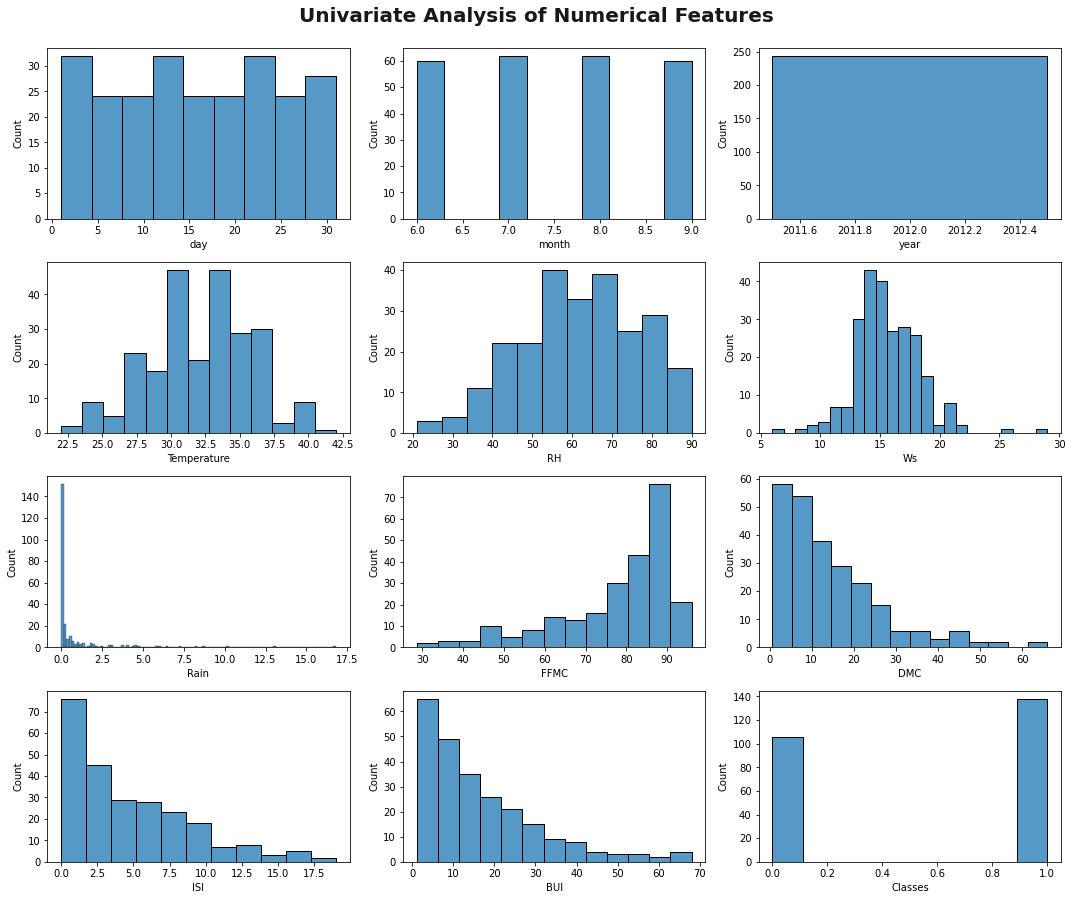

In [23]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

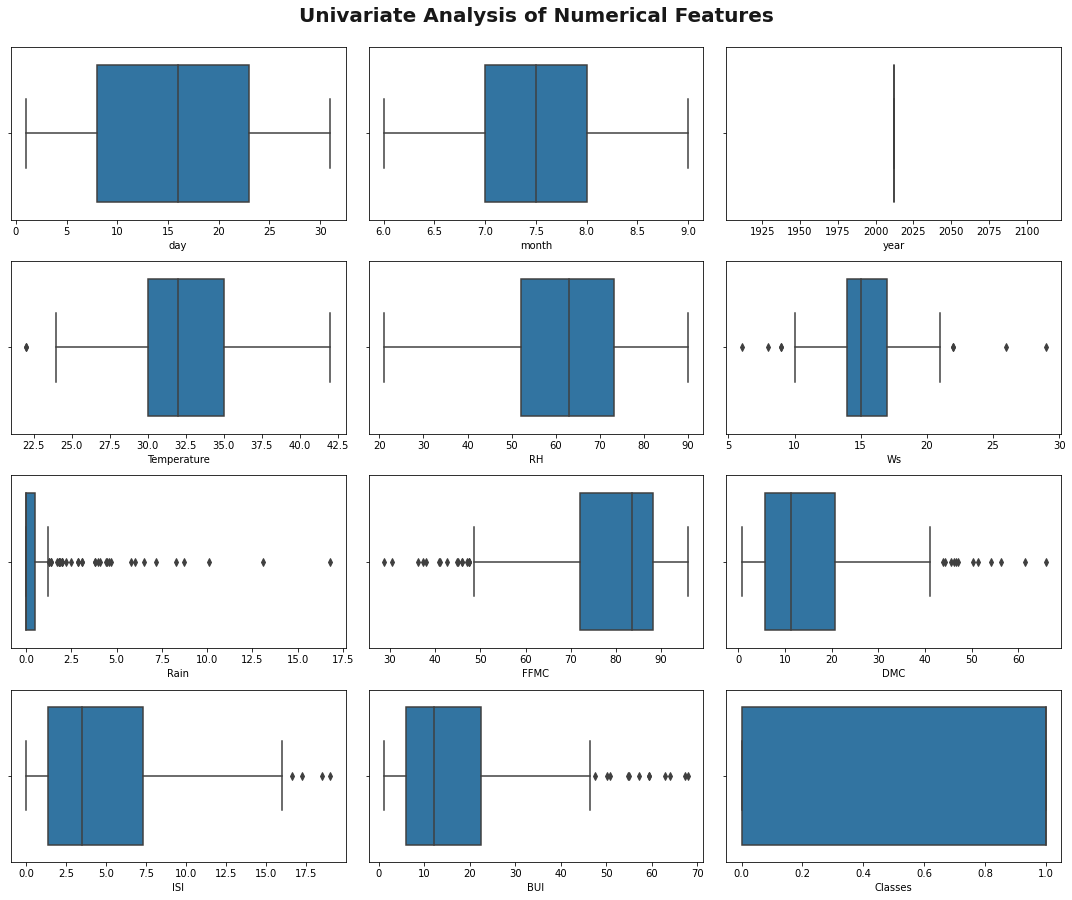

In [24]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

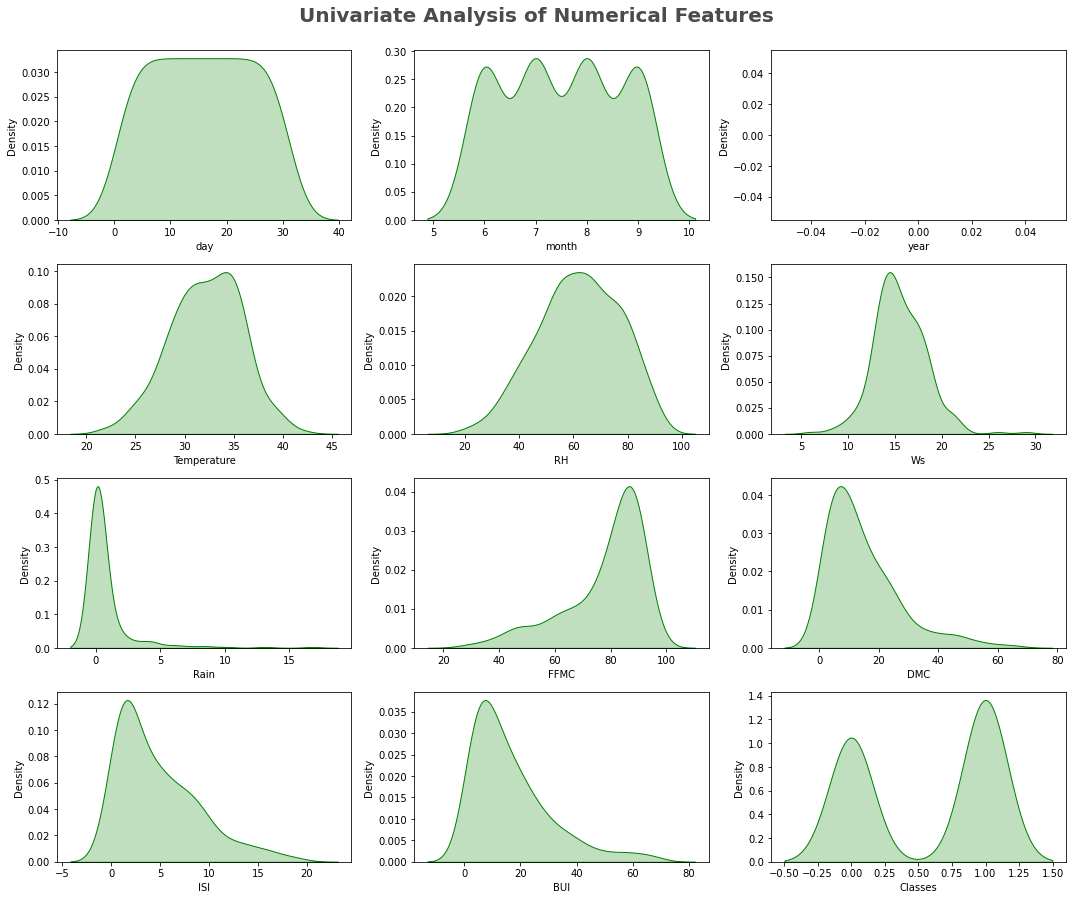

In [25]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.7, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='g')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Categorical Features

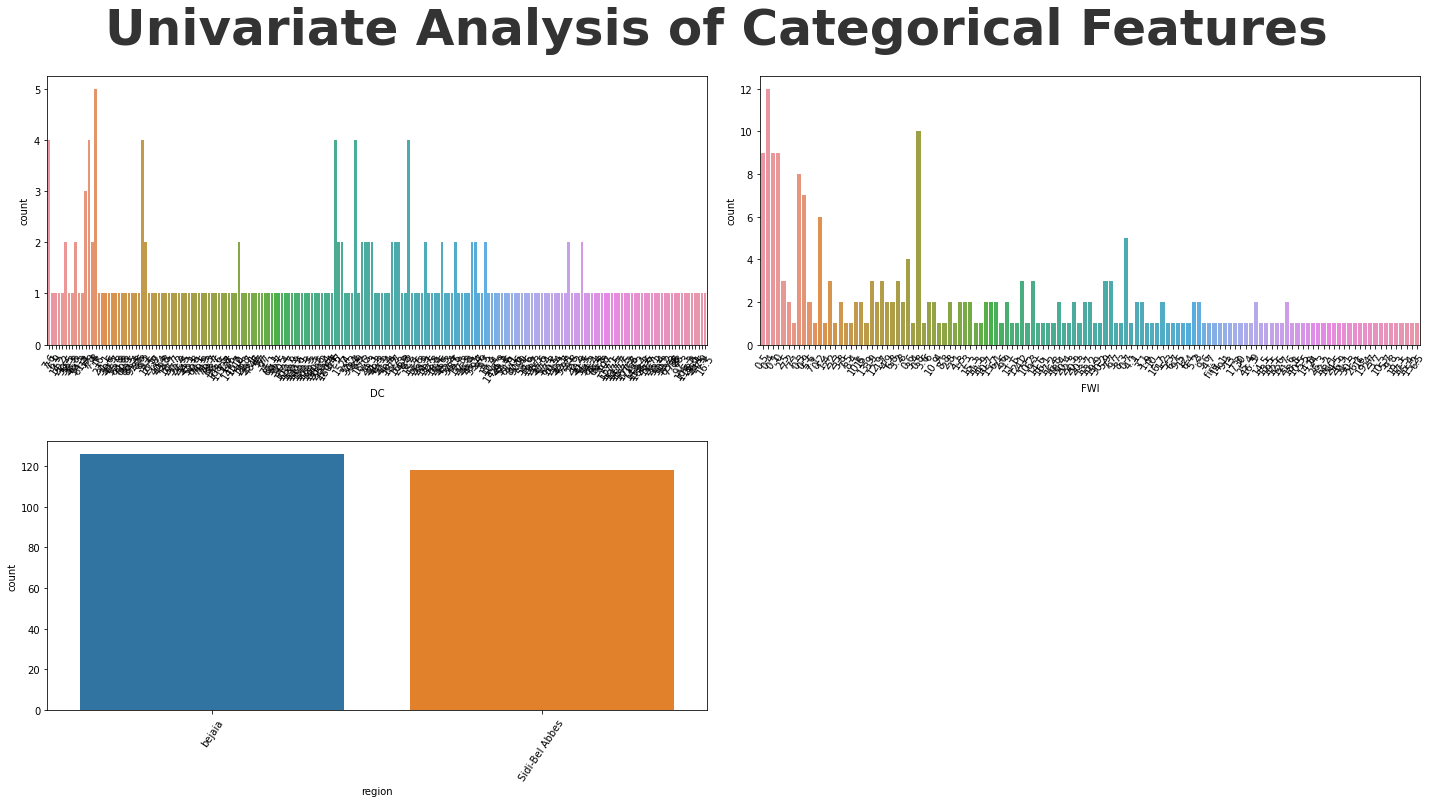

In [26]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=50, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=56)
    plt.tight_layout()


In [27]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.177727,0.517229,0.201784
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.061680,0.085822,0.022333
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,1.777266e-01,6.168011e-02,NaN,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511


## BIVARIATE ANALYSIS

## Which area has most of the time fire happen

<AxesSubplot:xlabel='region', ylabel='Classes'>

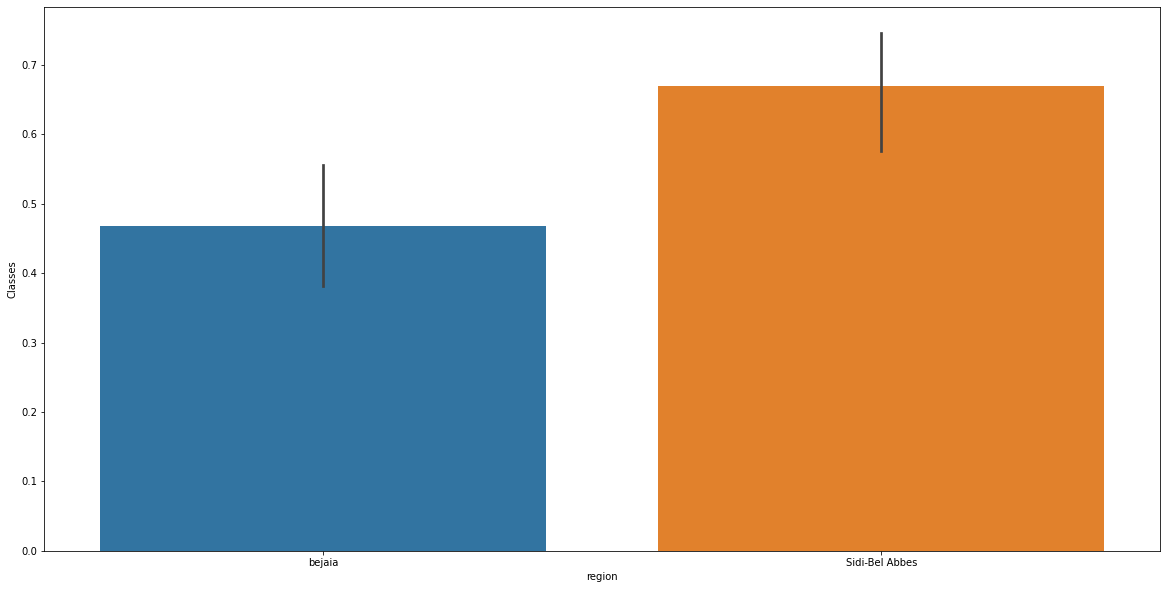

In [28]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Classes",data=df)

### Maximum Temperaure

In [29]:
df['Temperature'].max()

42

### Minimum Temperaure

In [30]:
df['Temperature'].min()

22

### Which region has most time rain happens

<AxesSubplot:xlabel='region', ylabel='Rain'>

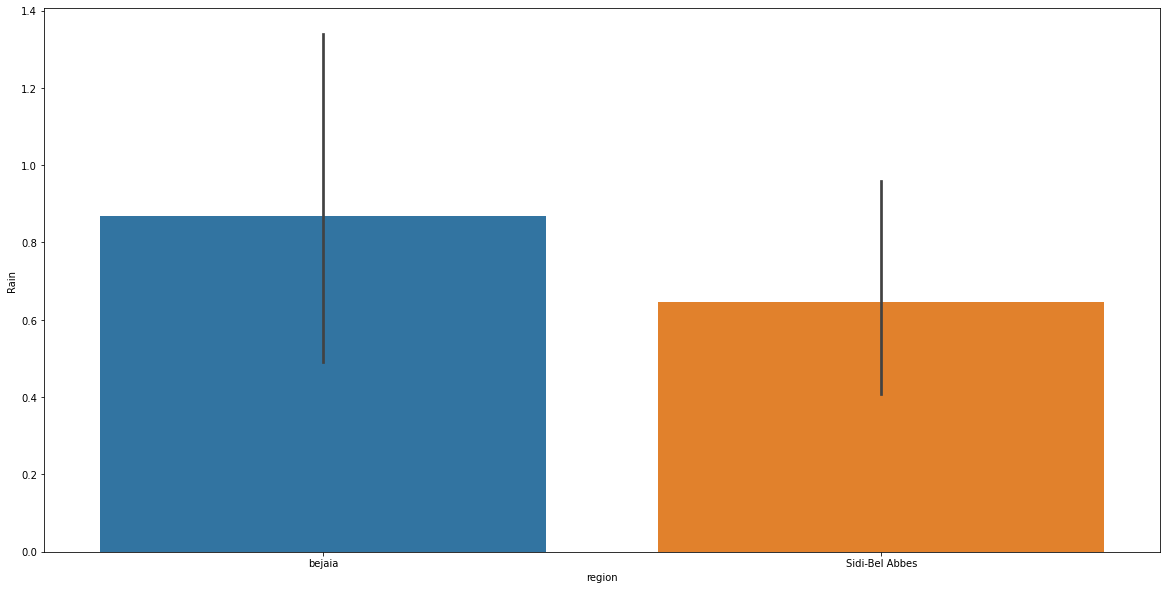

In [31]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Rain",data=df)

## Multivariate Analysis

In [32]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.177727,0.517229,0.201784
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.061680,0.085822,0.022333
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,1.777266e-01,6.168011e-02,NaN,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511


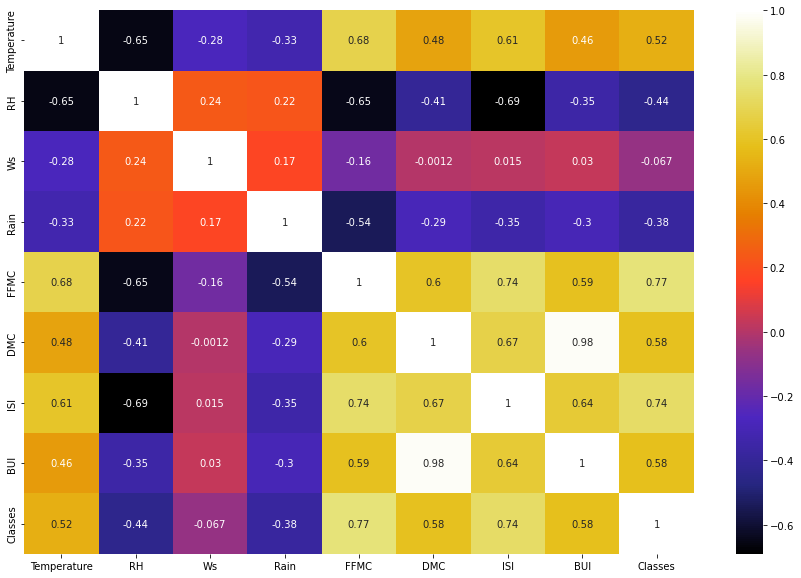

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True)
plt.show()

### Boxplot to find Outliers in the features

<AxesSubplot:>

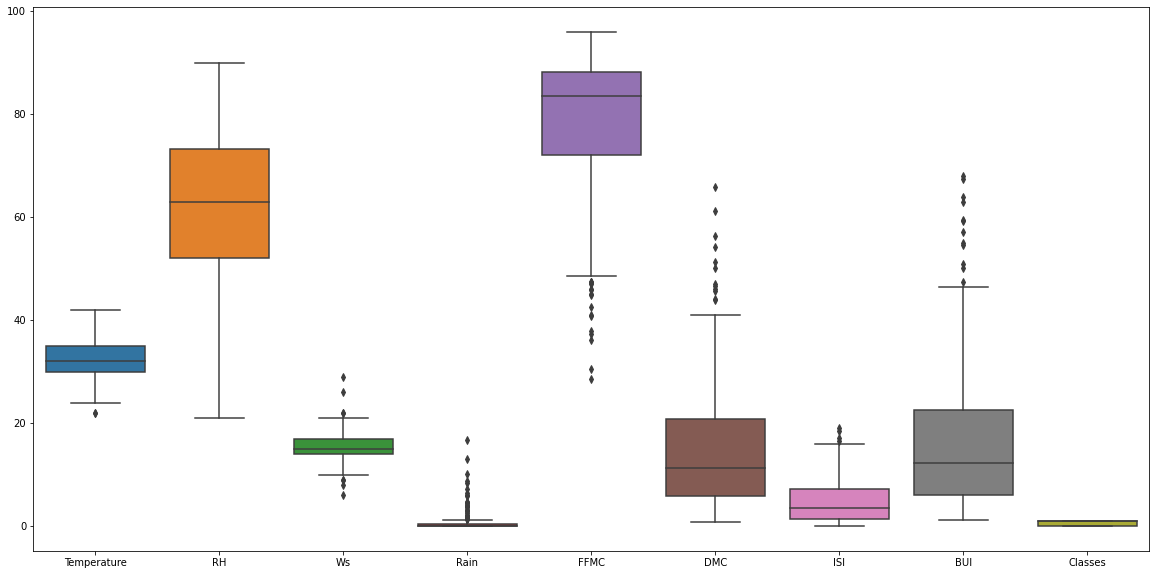

In [40]:

sns.boxplot(data = df,orient="v")

In [38]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,bejaia
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,Sidi-Bel Abbes
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0,Sidi-Bel Abbes
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,Sidi-Bel Abbes
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,Sidi-Bel Abbes


## How is the temperature in two different classes

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

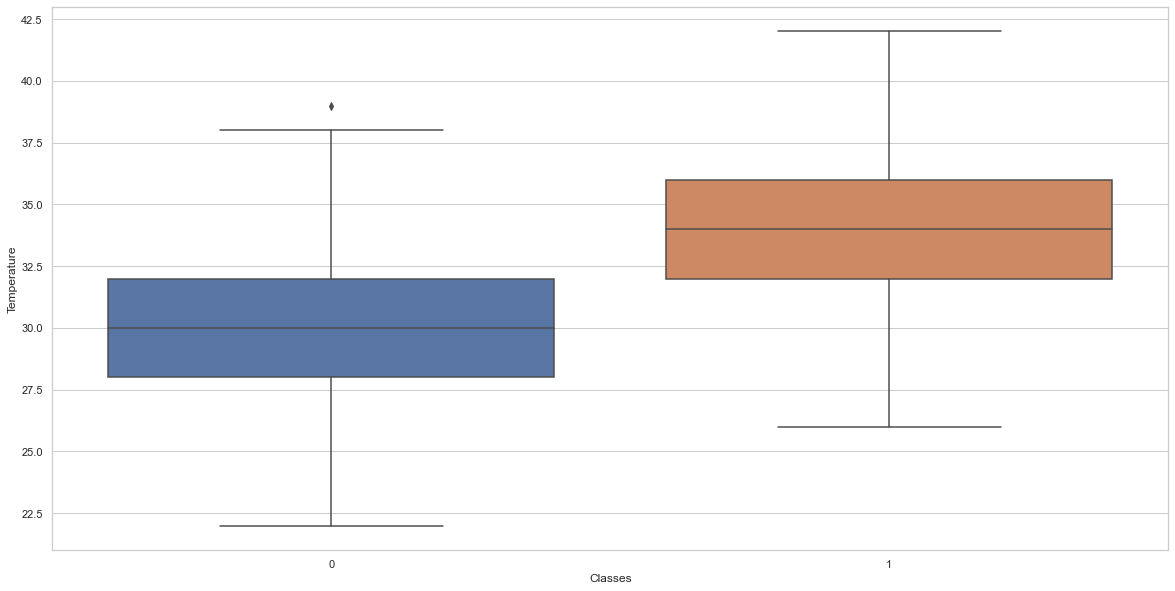

In [47]:
# use to set style of background of plot
sns.set(style="whitegrid")
sns.boxplot(x ='Classes', y ='Temperature', data = df)

* fire class have more temperature

## How rain impact on fire

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

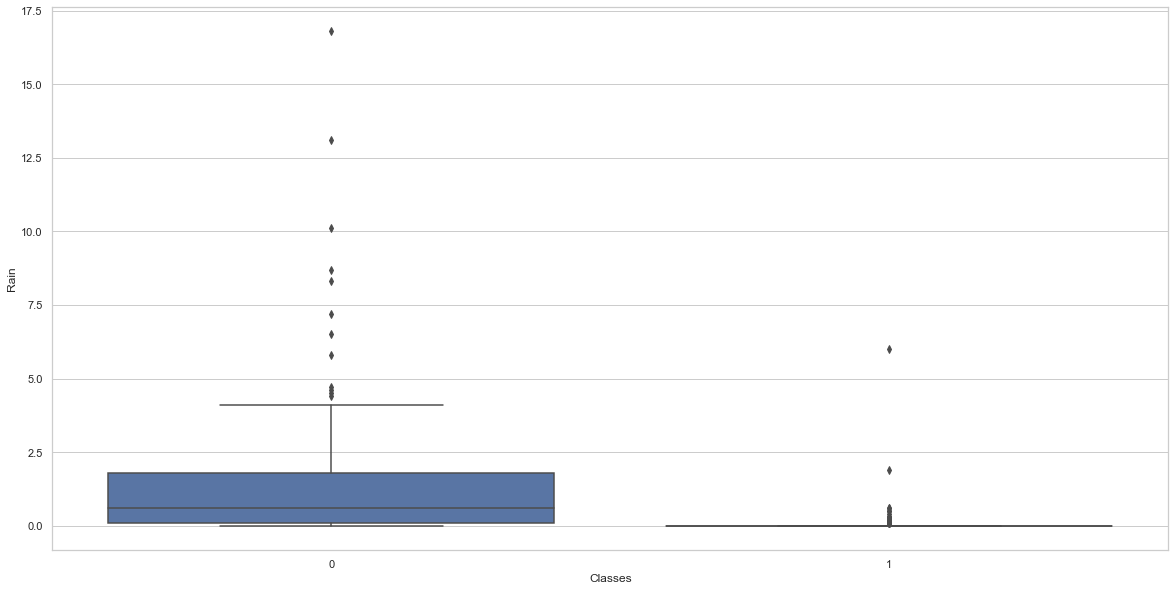

In [50]:
sns.set(style='whitegrid')
sns.boxplot(x='Classes',y='Rain',data=df)

In not fire class rain is very often 